<a href="https://colab.research.google.com/github/ndoshi83/DS-Unit-2-Regression-1/blob/master/NDoshi_DS4_Sprint_Challenge_6_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [2]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)
print(avocado.shape)

(169, 2)


### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

In [3]:
# Review dataframe
avocado.dtypes

Date            object
Total Volume     int64
dtype: object

In [4]:
# Convert Date feature to date time
avocado['Date'] = pd.to_datetime(avocado['Date'])

avocado.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [5]:
# Set index to date
avocado = avocado.set_index('Date')

avocado.head()

,Total Volume
Date,
2015-01-04,84674288
2015-01-11,78555753
2015-01-18,78388735
2015-01-25,76466226
2015-02-01,119453181


In [6]:
avocado = avocado.reindex(pd.date_range(start='2015-01-04', end='2020-03-25', freq = 'W'))

avocado.tail()

,Total Volume
2020-02-23,NaN
2020-03-01,NaN
2020-03-08,NaN
2020-03-15,NaN
2020-03-22,NaN


In [7]:
# Set feature names to match Prophet input and reset the index
avocado = avocado.reset_index().rename(columns={'index': 'ds', 'Total Volume': 'y'})

avocado.head()

,ds,y
0,2015-01-04,84674288.0
1,2015-01-11,78555753.0
2,2015-01-18,78388735.0
3,2015-01-25,76466226.0
4,2015-02-01,119453181.0


In [0]:
# Import Prophet library
from fbprophet import Prophet

In [9]:
# Create forecast using prophet
m = Prophet()
m.fit(avocado)



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# Create future df to add predictions
future = m.make_future_dataframe(periods=0)
future.tail()

,ds
268,2020-02-23
269,2020-03-01
270,2020-03-08
271,2020-03-15
272,2020-03-22


In [11]:
# Add predictions to df
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
268,2020-02-23,1.071643e+08,9.888228e+07,1.255181e+08,1.052325e+08,1.091014e+08,5.116932e+06,5.116932e+06,5.116932e+06,5.116932e+06,5.116932e+06,5.116932e+06,0.0,0.0,0.0,1.122812e+08
269,2020-03-01,1.072485e+08,9.478847e+07,1.207629e+08,1.052954e+08,1.092181e+08,-1.978449e+05,-1.978449e+05,-1.978449e+05,-1.978449e+05,-1.978449e+05,-1.978449e+05,0.0,0.0,0.0,1.070507e+08
270,2020-03-08,1.073327e+08,9.648059e+07,1.224976e+08,1.053496e+08,1.093351e+08,2.600233e+06,2.600233e+06,2.600233e+06,2.600233e+06,2.600233e+06,2.600233e+06,0.0,0.0,0.0,1.099330e+08
271,2020-03-15,1.074169e+08,1.013421e+08,1.280390e+08,1.053979e+08,1.094526e+08,7.584991e+06,7.584991e+06,7.584991e+06,7.584991e+06,7.584991e+06,7.584991e+06,0.0,0.0,0.0,1.150019e+08
272,2020-03-22,1.075012e+08,1.023023e+08,1.274777e+08,1.054438e+08,1.095659e+08,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,0.0,0.0,0.0,1.153503e+08


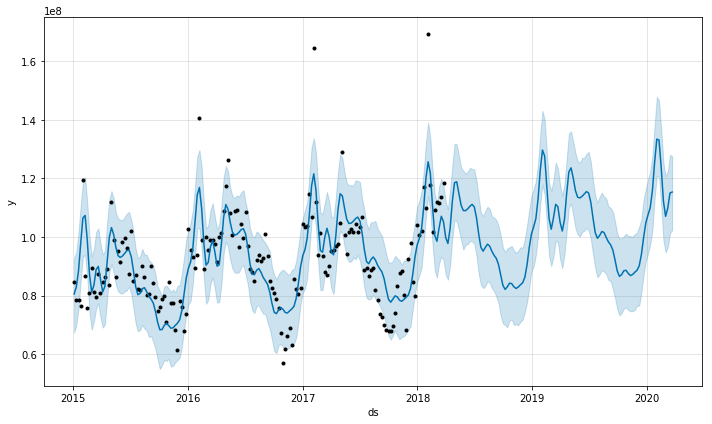

In [12]:
# Plot forecast
fig1 = m.plot(forecast)

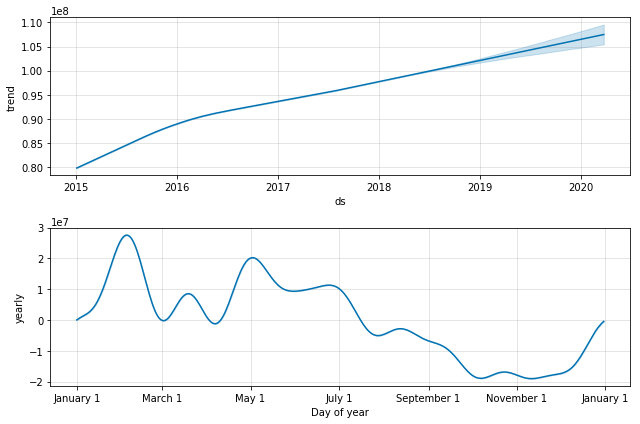

In [13]:
# Plot components
fig2 = m.plot_components(forecast)

In [21]:
# Create time series df to run in cross validation
avocado_model = Prophet(weekly_seasonality=False)
avocado_model.fit(avocado)

# Create predictions
avocado_forecast = avocado_model.predict(avocado)

avocado_forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
268,2020-02-23,1.071643e+08,9.826723e+07,1.250695e+08,1.053512e+08,1.090991e+08,5.116932e+06,5.116932e+06,5.116932e+06,5.116932e+06,5.116932e+06,5.116932e+06,0.0,0.0,0.0,1.122812e+08
269,2020-03-01,1.072485e+08,9.487723e+07,1.197240e+08,1.053860e+08,1.092190e+08,-1.978449e+05,-1.978449e+05,-1.978449e+05,-1.978449e+05,-1.978449e+05,-1.978449e+05,0.0,0.0,0.0,1.070507e+08
270,2020-03-08,1.073327e+08,9.647436e+07,1.229668e+08,1.054429e+08,1.093342e+08,2.600233e+06,2.600233e+06,2.600233e+06,2.600233e+06,2.600233e+06,2.600233e+06,0.0,0.0,0.0,1.099330e+08
271,2020-03-15,1.074169e+08,1.023082e+08,1.276795e+08,1.055101e+08,1.094578e+08,7.584991e+06,7.584991e+06,7.584991e+06,7.584991e+06,7.584991e+06,7.584991e+06,0.0,0.0,0.0,1.150019e+08
272,2020-03-22,1.075012e+08,1.032421e+08,1.283049e+08,1.055754e+08,1.095720e+08,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,0.0,0.0,0.0,1.153503e+08


In [22]:
# Create time series cross-validation using the Prophet functionality
# Import needed functions
from fbprophet.diagnostics import cross_validation
avocado_cv = cross_validation(avocado_model, initial='730 days', 
                         horizon='90 days', period='45 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


In [25]:
# Review CV
print(avocado_cv.shape)

print(avocado_cv.head())

(103, 6)
          ds          yhat    yhat_lower    yhat_upper            y     cutoff
0 2017-02-19  1.074419e+08  9.547954e+07  1.197186e+08   93821369.0 2017-02-13
1 2017-02-26  9.893204e+07  8.769728e+07  1.108173e+08  101447375.0 2017-02-13
2 2017-03-05  9.916261e+07  8.780201e+07  1.107241e+08   93528247.0 2017-02-13
3 2017-03-12  1.051747e+08  9.261685e+07  1.165811e+08   88180047.0 2017-02-13
4 2017-03-19  1.088062e+08  9.707480e+07  1.196775e+08   86991403.0 2017-02-13


In [26]:
# Evaluate performance metrics using built in functions from Prophet
from fbprophet.diagnostics import performance_metrics
performance_metrics(avocado_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,9 days,1.158354e+14,1.076269e+07,9.050419e+06,0.102819,0.5
1,10 days,1.153774e+14,1.074139e+07,8.954063e+06,0.101604,0.5
2,11 days,8.981248e+13,9.476945e+06,7.979616e+06,0.088963,0.6
3,12 days,9.503492e+13,9.748585e+06,8.671075e+06,0.099294,0.6
4,13 days,9.551160e+13,9.773004e+06,8.876740e+06,0.098013,0.6


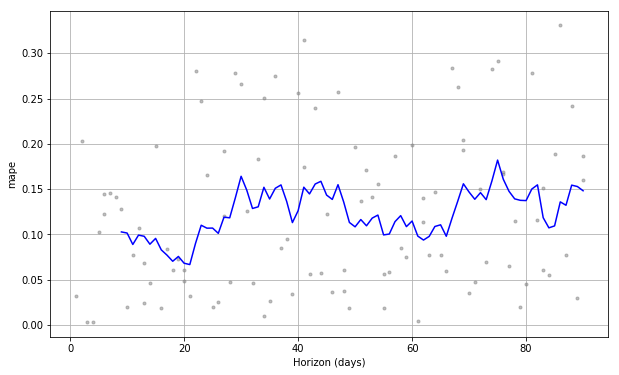

In [27]:
# Use Prophet to plot MAPE
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(avocado_cv, metric='mape')

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [36]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)
print(rent.shape)

(48295, 7)


In [37]:
# Review df
print(rent.head())

print(rent.describe())

   year  month  bedrooms  bathrooms  latitude  longitude  price
0  2016      6         3        1.5   40.7145   -73.9425   3000
1  2016      6         2        1.0   40.7947   -73.9667   5465
2  2016      4         1        1.0   40.7388   -74.0018   2850
3  2016      4         1        1.0   40.7539   -73.9677   3275
4  2016      4         4        1.0   40.8241   -73.9493   3350
          year         month  ...     longitude         price
count  48295.0  48295.000000  ...  48295.000000  48295.000000
mean    2016.0      5.014950  ...    -73.972366   3438.052034
std        0.0      0.824537  ...      0.029563   1401.003716
min     2016.0      4.000000  ...    -74.094000   1025.000000
25%     2016.0      4.000000  ...    -73.991700   2495.000000
50%     2016.0      5.000000  ...    -73.977900   3100.000000
75%     2016.0      6.000000  ...    -73.954700   4000.000000
max     2016.0      6.000000  ...    -73.700100   9999.000000

[8 rows x 7 columns]


### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [39]:
# Calculate mean baseline using full dataset
rent['mean_baseline'] = [rent['price'].mean()] * len(rent)

rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price,mean_baseline
0,2016,6,3,1.5,40.7145,-73.9425,3000,3438.052034
1,2016,6,2,1.0,40.7947,-73.9667,5465,3438.052034
2,2016,4,1,1.0,40.7388,-74.0018,2850,3438.052034
3,2016,4,1,1.0,40.7539,-73.9677,3275,3438.052034
4,2016,4,4,1.0,40.8241,-73.9493,3350,3438.052034


In [42]:
# Calculate MAE and R^2 using sklearn metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_true=rent['price'], 
                    y_pred=rent['mean_baseline'])

r2 = r2_score(y_true=rent['price'], 
                    y_pred=rent['mean_baseline'])

# Print results

print('The mean absolute error is:', mae,'\n')
print('The R^2 is:', r2)

The mean absolute error is: 1055.7857771080928 

The R^2 is: 0.0


In [49]:
# Split the dataset into train and test groups according to breakdown listed above
rent_train = rent.loc[rent['month'] != 6]
rent_test = rent.loc[rent['month'] == 6]

print(rent_train.describe())
print(rent_test.describe())

          year         month  ...         price  mean_baseline
count  31512.0  31512.000000  ...  31512.000000   3.151200e+04
mean    2016.0      4.490321  ...   3432.681233   3.438052e+03
std        0.0      0.499914  ...   1398.350939   1.619836e-09
min     2016.0      4.000000  ...   1025.000000   3.438052e+03
25%     2016.0      4.000000  ...   2490.000000   3.438052e+03
50%     2016.0      4.000000  ...   3100.000000   3.438052e+03
75%     2016.0      5.000000  ...   4000.000000   3.438052e+03
max     2016.0      5.000000  ...   9999.000000   3.438052e+03

[8 rows x 8 columns]
          year    month      bedrooms  ...    longitude         price  mean_baseline
count  16783.0  16783.0  16783.000000  ...  16783.00000  16783.000000   1.678300e+04
mean    2016.0      6.0      1.523387  ...    -73.97218   3448.136328   3.438052e+03
std        0.0      0.0      1.088629  ...      0.02944   1405.957390   9.772812e-10
min     2016.0      6.0      0.000000  ...    -74.04540   1050.000000  

In [0]:
# Selecting 2 features to use for linear regression testing
features = ['bedrooms', 'bathrooms']

target = 'price'

In [0]:
# Use Scikit-Learn to perform linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [0]:
# Assign selected features and target to X and y
X = rent_train[features]
y = rent_train[target]

In [53]:
# Fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Apply model on test dataset
y_pred = model.predict(rent_test[features])

In [55]:
# Calculate regression metrics for predicted targets on test data
rent_test_mae = mean_absolute_error(rent_test[target],y_pred)
rent_test_r2 = r2_score(rent_test[target],y_pred)

print('The MAE for test is:', rent_test_mae, '\n')
print('The R^2 for test is:', rent_test_r2)

The MAE for test is: 754.0733041489015 

The R^2 for test is: 0.4613584851907725


In [57]:
# Show the coefficients and intercept
rent_test_coef = pd.Series(model.coef_, features)

print('The coefficients are:\n', rent_test_coef)

print('The intercept is:\n', model.intercept_)

The coefficients are:
 bedrooms      420.509717
bathrooms    1531.762648
dtype: float64
The intercept is:
 994.3062975058142
